# Objective Of This Code Along:
 
Make sure learners understand the text generation using LSTM.

# Jump to [Part 1](#Step1)

# Import Libraries

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np
import matplotlib.pyplot as plt

<hr style="border:2px solid gray">
<a name= "Step1"></a>

# <font color='RED'> **MAKE SURE TO RUN ALL PREVIOUS CELLS**


- Load sonnets text from shakespeare 
- use tensorflow `Tokenizer` function to tokenize all the text 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
data = open('/content/drive/MyDrive/DS_Sprint_13_14_15/Version3/S15/S15.1/sonnets.txt').read()
corpus = data.lower().split("\n")

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1


- create list of n-gram sequence
- pad the sequence
- create input and output from the list of padded n-gram sequences

In [ ]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [ ]:
# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]
label = ku.to_categorical(label, num_classes=total_words)


- use 100 dimensional embeddings for each word
- apply bidirectional lstm layer on top of embeddings
- for regularization, use dropout
- on the top use lstm and dense layers

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 100)           337500    
                                                                 
 bidirectional (Bidirectiona  (None, 10, 300)          301200    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 10, 300)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1687)              170387    
                                                                 
 dense_1 (Dense)             (None, 3375)              5697000   
                                                        


- fit the model using `model.fit`
- plot the accuracy and loss graphs
- predict the next word given the seed words

In [ ]:
epochs = 10
history = model.fit(predictors, label, epochs=epochs, verbose=1)

Epoch 1/10
484/484 [==============================] - 11s 10ms/step - loss: 6.9184 - accuracy: 0.0198
Epoch 2/10
484/484 [==============================] - 5s 10ms/step - loss: 6.5102 - accuracy: 0.0218
Epoch 3/10
484/484 [==============================] - 5s 10ms/step - loss: 6.4048 - accuracy: 0.0251
Epoch 4/10
484/484 [==============================] - 5s 10ms/step - loss: 6.2827 - accuracy: 0.0295
Epoch 5/10
484/484 [==============================] - 5s 10ms/step - loss: 6.1916 - accuracy: 0.0362
Epoch 6/10
484/484 [==============================] - 5s 10ms/step - loss: 6.1090 - accuracy: 0.0383
Epoch 7/10
484/484 [==============================] - 5s 10ms/step - loss: 6.0312 - accuracy: 0.0409
Epoch 8/10
484/484 [==============================] - 5s 10ms/step - loss: 5.9475 - accuracy: 0.0439
Epoch 9/10
484/484 [==============================] - 6s 11ms/step - loss: 5.8475 - accuracy: 0.0492
Epoch 10/10
484/484 [==============================] - 5s 11ms/step - loss: 5.7387 - accur

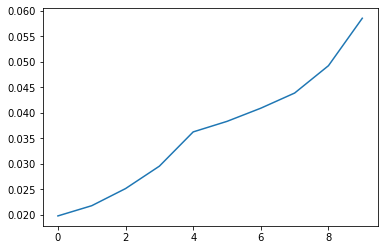

In [ ]:
plt.plot(range(epochs), history.history['accuracy']);

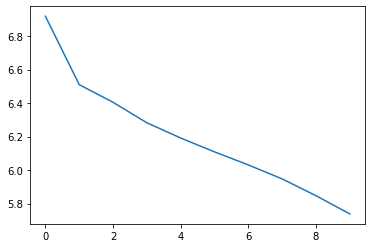

In [ ]:
plt.plot(range(epochs), history.history['loss']);

In [ ]:
seed_text = "And dig deep"
next_words = 5

In [ ]:
for _ in range(next_words):
    
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted_ = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted_)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
    print(seed_text)

And dig deep in
And dig deep in the
And dig deep in the love
And dig deep in the love of
And dig deep in the love of be


# <font color='orange'>**STOP HERE**